**Load the Data and Libraries**

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import seaborn as sns
import json
from collections import Counter
import matplotlib.pyplot as plt
import re

/var/folders/x8/m_rmpl596lxb3cysqszzjs0c0000gn/T/ipykernel_44648/1195853885.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [23]:
data = pd.read_csv('moviesdataset.csv')

In [25]:
import pandas as pd
import ast

# Define a function to safely evaluate the string to a list
def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        # Return None or some form of indication that the string could not be parsed
        return None

# Apply this function to the 'cast' column
# This assumes that the entries in the 'cast' column are strings formatted like Python lists
data['cast'] = data['cast'].apply(safe_literal_eval)

# Check if the operation was successful by printing the type of the first entry
if data['cast'].apply(type).iloc[0] == list:
    print("Conversion successful. 'cast' is now a list of lists.")
else:
    print("Conversion failed. The entries in 'cast' are not in the expected string format.")

# Show the first few entries of the 'cast' column to verify
data['cast'].head()


Conversion failed. The entries in 'cast' are not in the expected string format.


0    None
1    None
2    None
3    None
4    None
Name: cast, dtype: object

In [3]:
def parse(column):
    list_genres = []
    for json_str in column:
        try:
            # Load the string as JSON and extract the genre information
            genres = json.loads(json_str.replace("'", "\""))  # Ensure double quotes for JSON
            for genre_dict in genres:
                if 'name' in genre_dict:
                    list_genres.append(genre_dict['name'])
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
    return Counter(list_genres)


# Create a bar chart for the genres frequency
def plot_frequency(counter, name):
    column_keys = list(counter.keys())
    counts = list(counter.values())
    

    # if len(column_keys) > 20: 
    #     column_keys = column_keys[:20]
    #     counts = counts[:20]

    plt.figure(figsize=(10, 8))
    plt.bar(column_keys, counts, color='skyblue')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {name}')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    
def plot_pie_chart(counter, name):
    
    labels = list(counter.keys())
    frequency = list(counter.values())
    plt.figure(figsize=(8, 8))
    plt.pie( frequency, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'{name} Distribution')
    plt.show()
    
    
def extract(string):
    # This pattern needs to be adapted to the actual format of your 'keywords' strings
    pattern = re.compile(r'\b\w+\b')  # This pattern looks for words
    return pattern.findall(string)

            

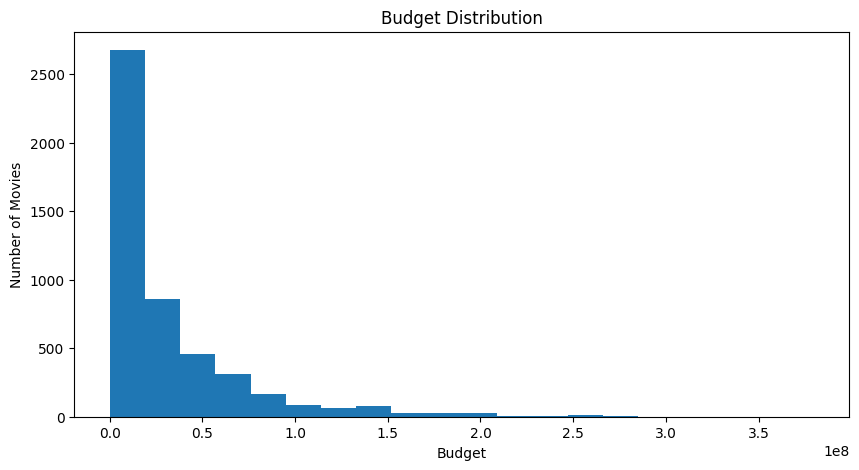

In [16]:
data['budget'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Budget Distribution')
plt.xlabel('Budget')
plt.ylabel('Number of Movies')
plt.show()

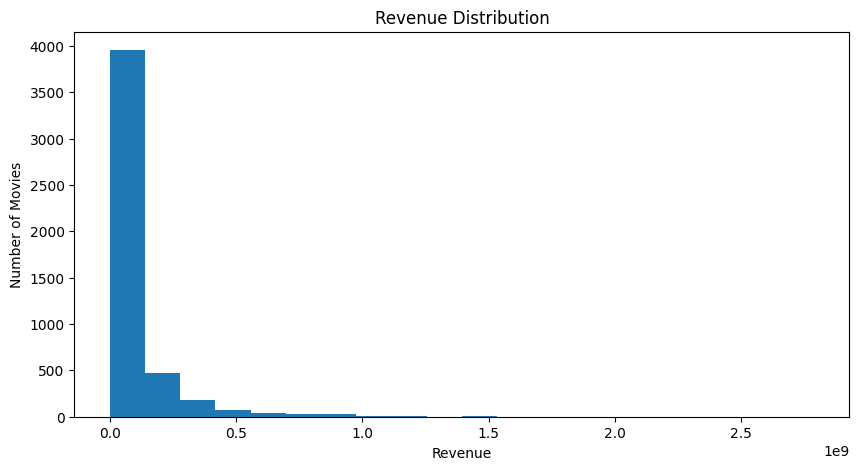

In [14]:
data['revenue'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Number of Movies')
plt.show()

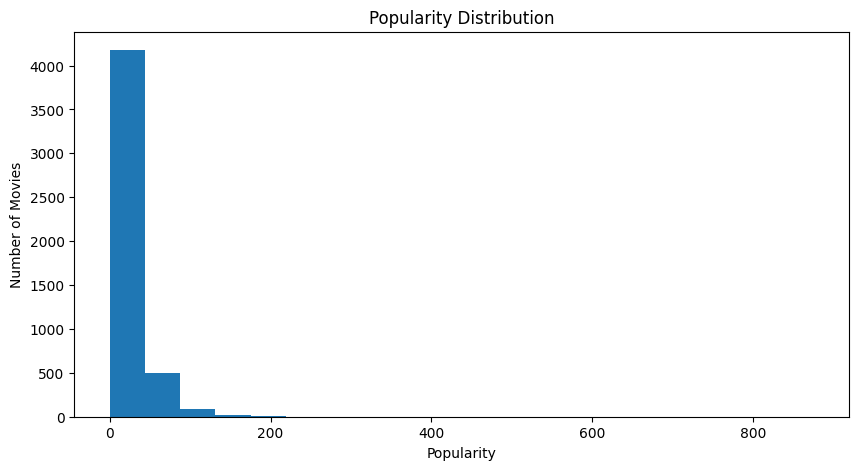

In [13]:
data['popularity'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Number of Movies')
plt.show()

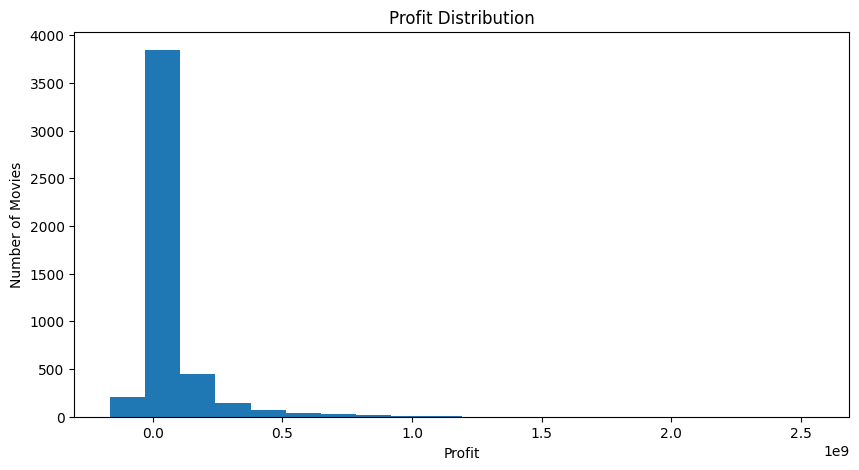

In [12]:
#Profit
data['profit'] = data.revenue - data.budget
data['profit'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Number of Movies')
plt.show()

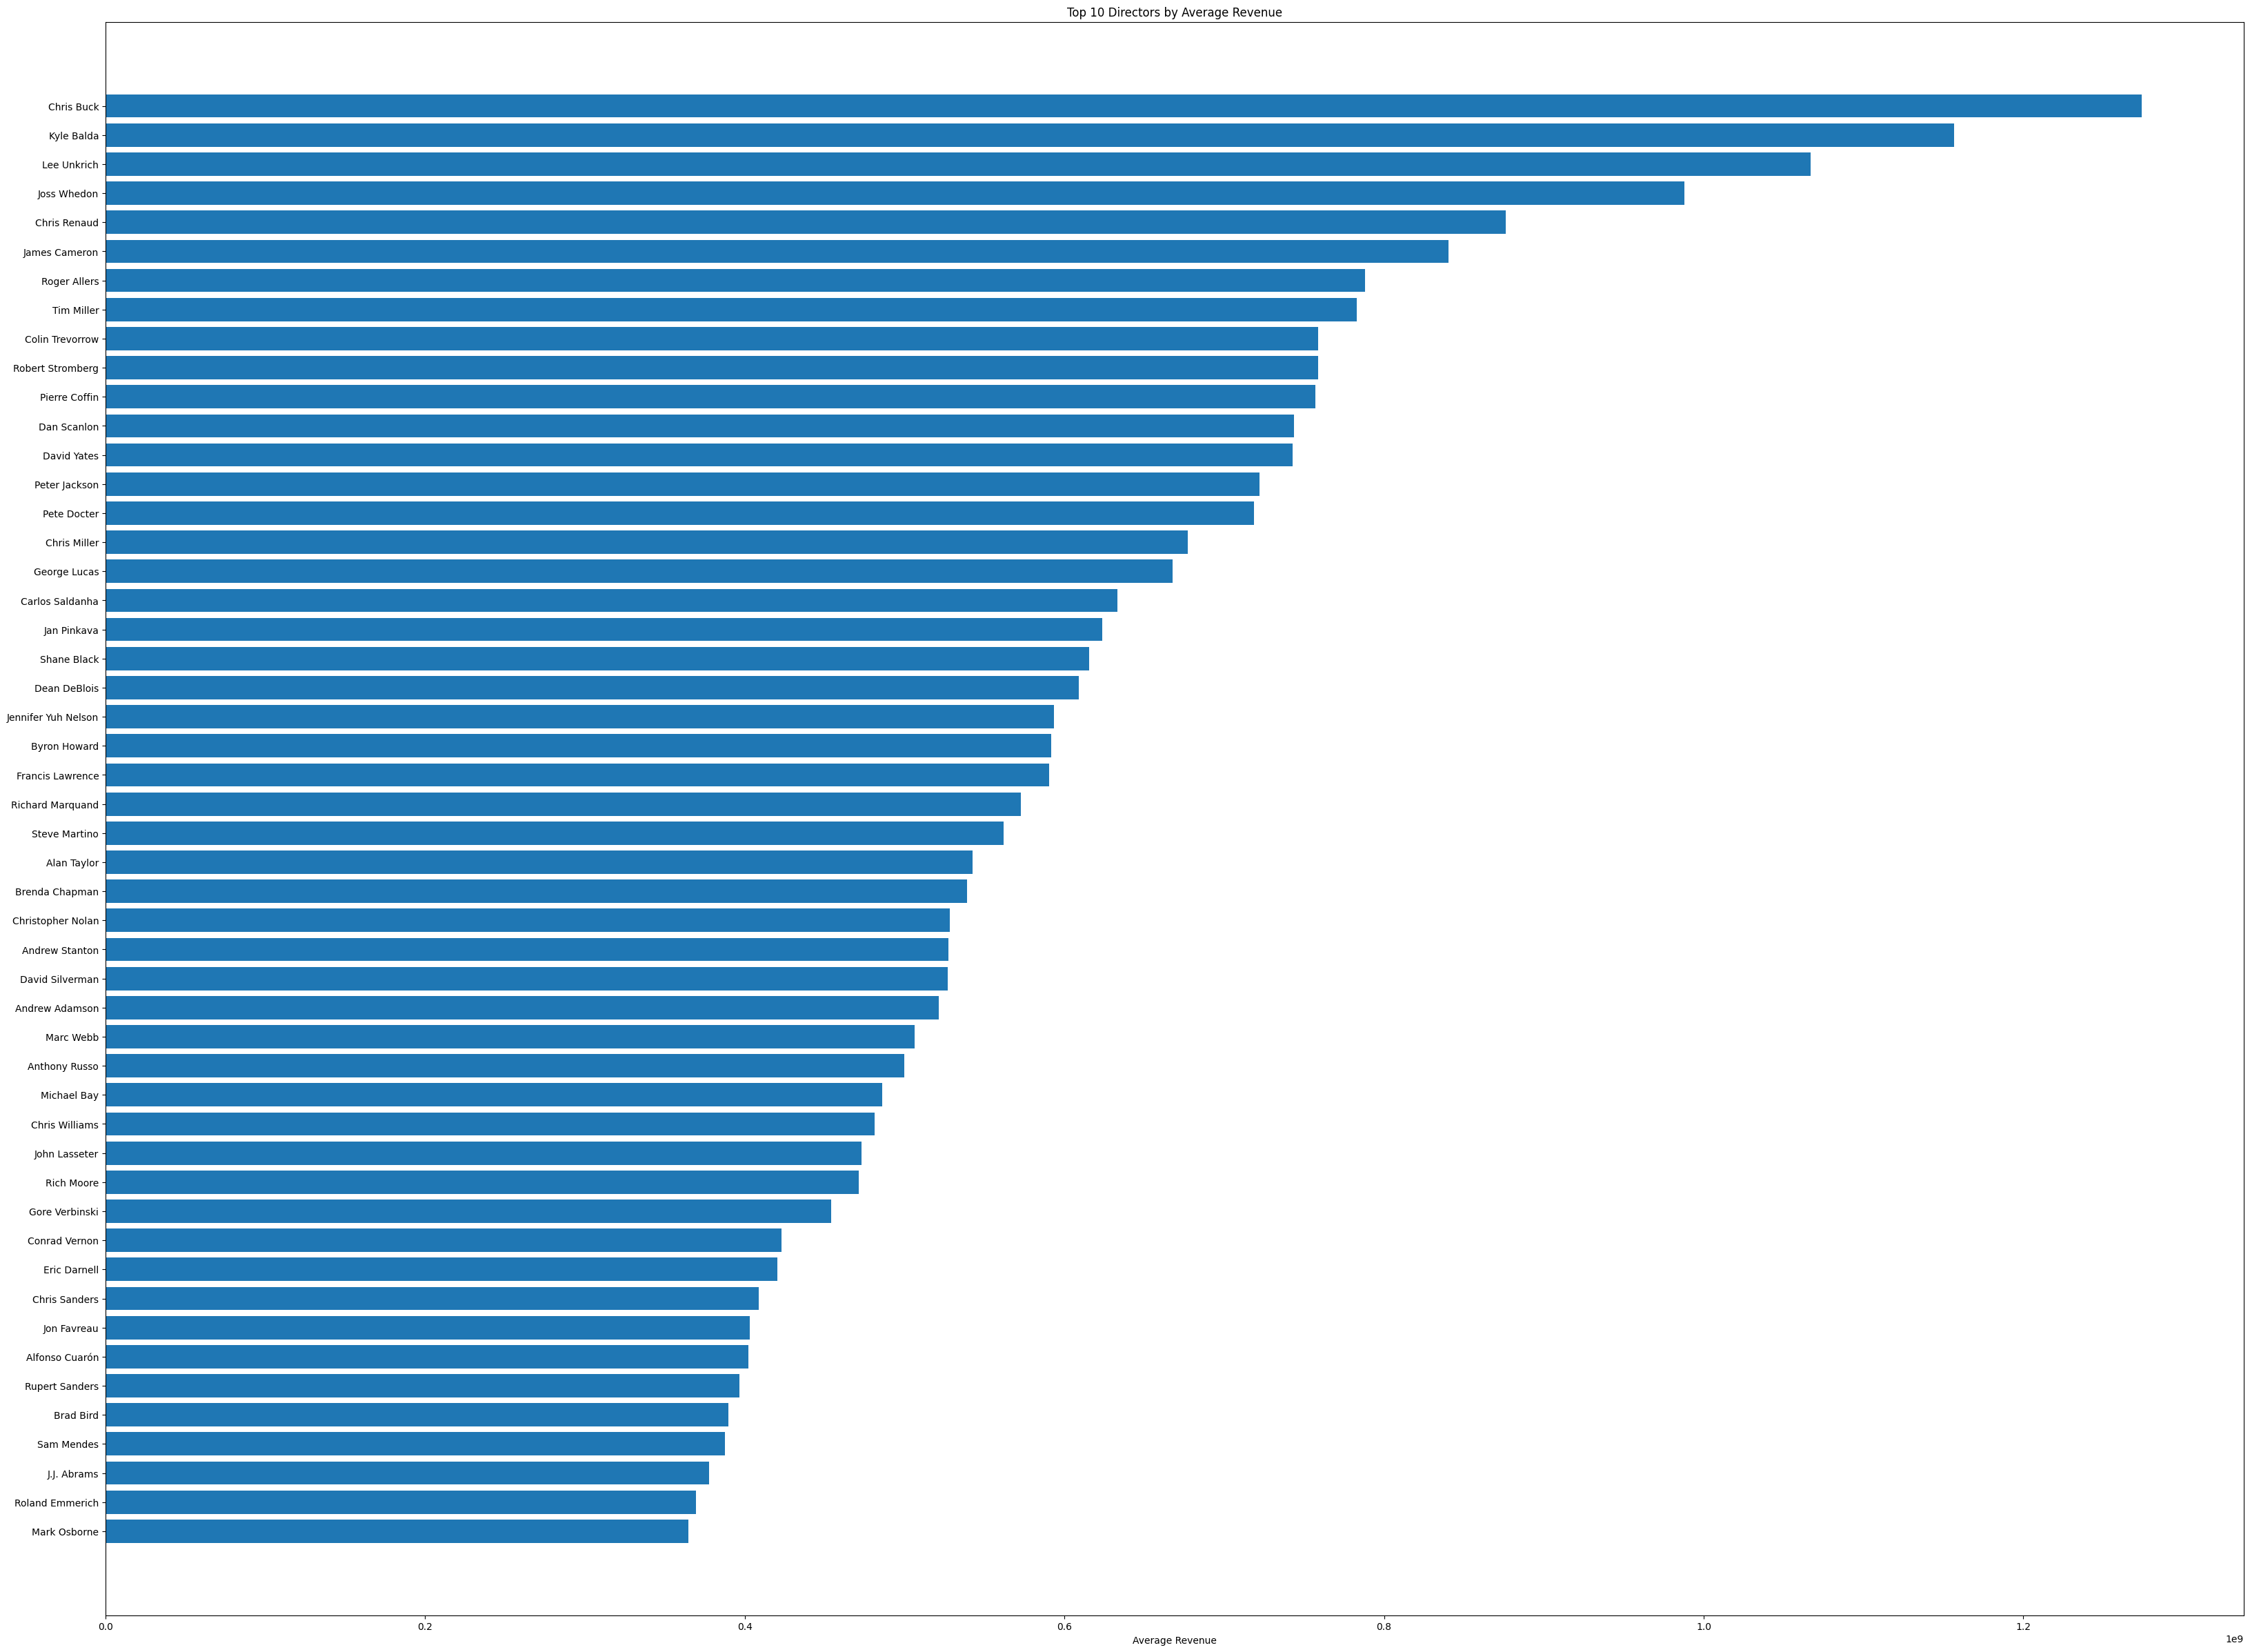

In [5]:
directors_revenue_df = data.groupby('director_name')['revenue'].mean().sort_values(ascending=False).head(50)
# Plotting
plt.figure(figsize=(40, 30))
plt.barh(directors_revenue_df.index, directors_revenue_df.values)
plt.xlabel('Average Revenue')
plt.title('Top 10 Directors by Average Revenue')
plt.gca().invert_yaxis() 
plt.show()


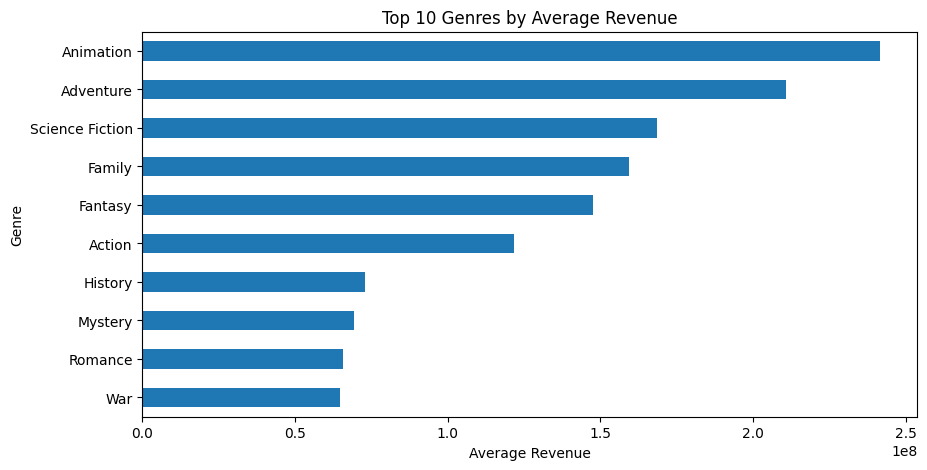

In [19]:
exploded_genres = data.explode('dominant_genre')

# Now, group by the individual genres and calculate the average revenue
avg_revenue_genre = exploded_genres.groupby('dominant_genre')['revenue'].mean().nlargest(10)

# Plot the average revenue per genre
avg_revenue_genre.plot(kind='barh', figsize=(10, 5))
plt.title('Top 10 Genres by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Inverts the y-axis so the highest value is at the top
plt.show()


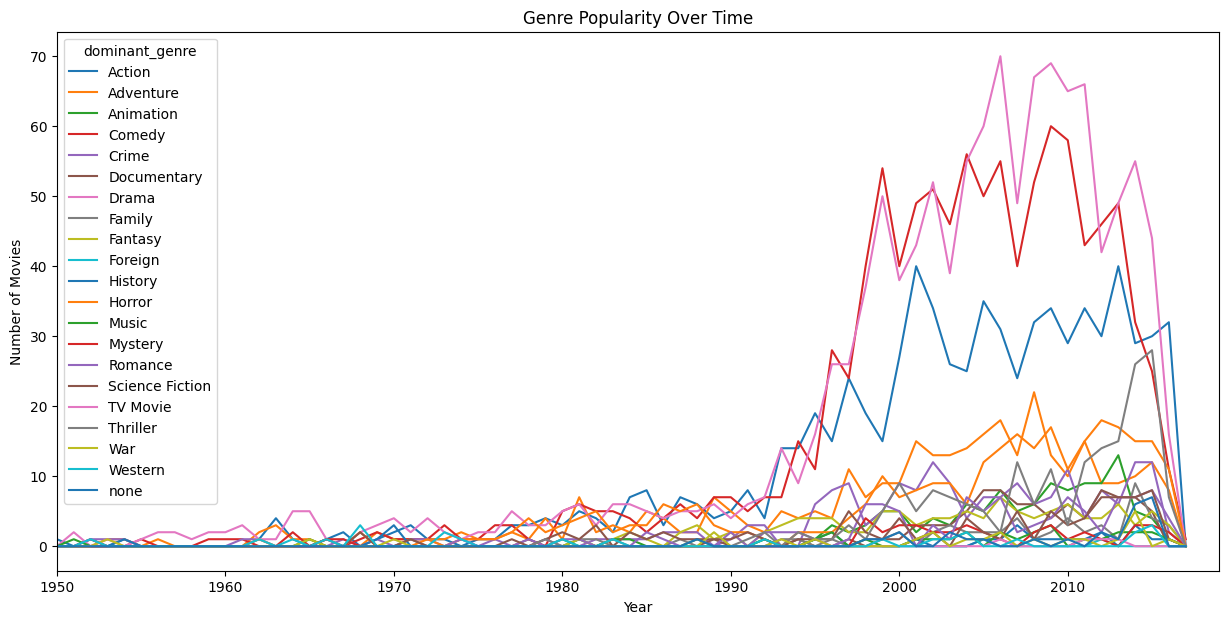

In [147]:
filtered_data = data[(data['title_year'] >= 1950) & (data['title_year'] <= 2019)]

genre_popularity = filtered_data.groupby(['title_year', 'dominant_genre']).size().unstack(fill_value=0)

genre_popularity.plot(figsize=(15, 7))
plt.title('Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xlim(1950, 2019) 
plt.show()


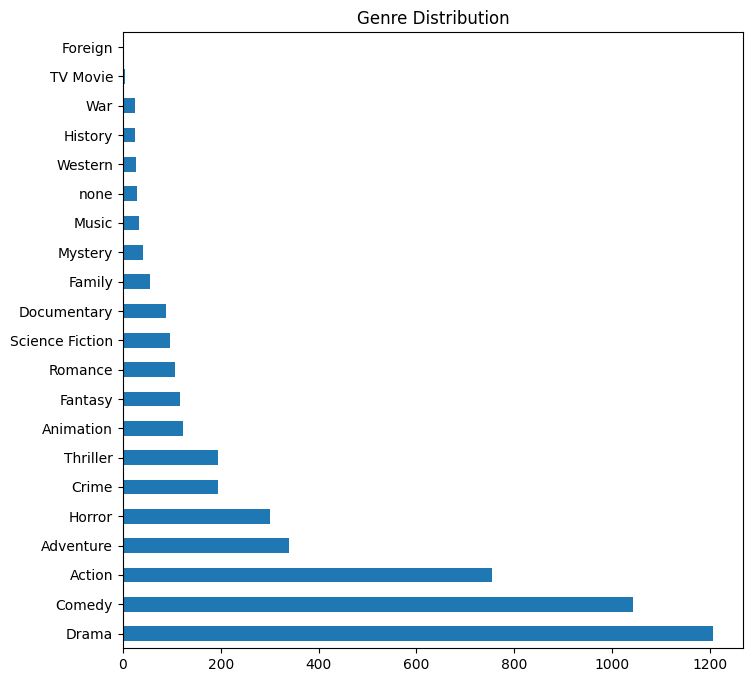

In [21]:
genre_counts = data['dominant_genre'].explode().value_counts()
genre_counts.plot(kind='barh', figsize=(8, 8))
plt.title('Genre Distribution')
plt.ylabel('')
plt.show()

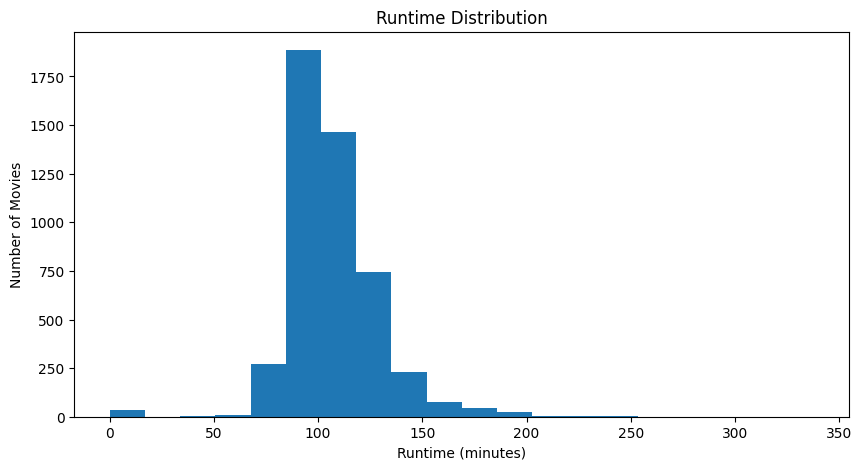

In [149]:
data['runtime'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()


In [ ]:
data[['budget', 'revenue', 'runtime', 'cast_size', 'sound_department_size', 'costume_department_size', 'editing_department_size', 'production_department_size', 'art_department_size', 'camera_department_size', 'vx_department_size', 'male_cast_count', 'female_cast_count', 'unstated_gender_cast_count']].describe()


,budget,revenue,runtime,cast_size,sound_department_size,costume_department_size,editing_department_size,production_department_size,art_department_size,camera_department_size,vx_department_size,male_cast_count,female_cast_count,unstated_gender_cast_count
count,4.803000e+03,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,8.226064e+07,106.875859,22.123048,3.367895,2.329377,1.635436,5.762024,3.092442,1.916302,1.572559,10.054341,5.031855,7.036852
std,4.072239e+07,1.628571e+08,22.611935,19.582493,4.863718,3.831546,1.871811,5.417416,4.639502,2.702766,4.900413,7.942877,5.368746,11.176134
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.900000e+05,0.000000e+00,94.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2.000000,1.000000
50%,1.500000e+07,1.917000e+07,103.000000,16.000000,1.000000,1.000000,1.000000,5.000000,2.000000,1.000000,0.000000,8.000000,4.000000,4.000000
75%,4.000000e+07,9.291719e+07,118.000000,25.000000,4.000000,3.000000,2.000000,8.000000,4.000000,2.000000,1.000000,13.000000,6.000000,8.000000
max,3.800000e+08,2.787965e+09,338.000000,224.000000,33.000000,44.000000,21.000000,36.000000,48.000000,28.000000,104.000000,88.000000,107.000000,164.000000


In [ ]:
# Load the TMDB movie and credits datasets
movies_path = '/Users/abaridavis/Documents_/MICHIGAN/Senior Year/W24/EECS 448/Project Work/box-officer/tmdb_movie_metadata/tmdb_5000_movies.csv'
credits_path = '/Users/abaridavis/Documents_/MICHIGAN/Senior Year/W24/EECS 448/Project Work/box-officer/tmdb_movie_metadata/tmdb_5000_credits.csv'

movies_df = pd.read_csv(movies_path)
credits_df = pd.read_csv(credits_path)

# Merge the movies and credits datasets on movie ID
merged_df = movies_df.merge(credits_df, left_on='id', right_on='movie_id')

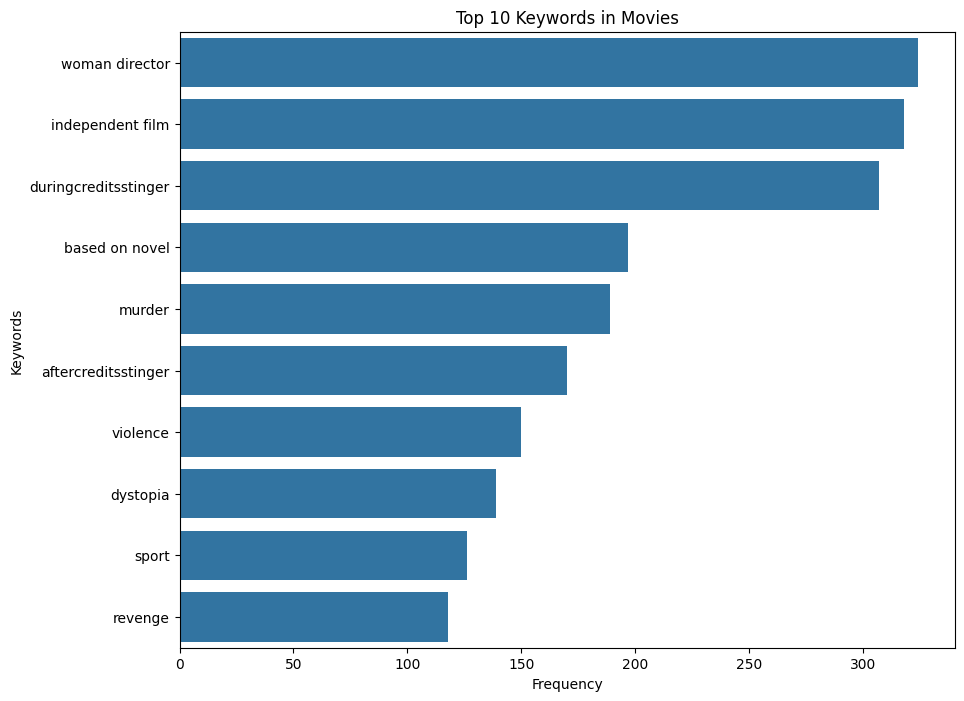

In [ ]:
merged_df['keywords'] = merged_df['keywords'].apply(literal_eval)

# Extract keywords and count their occurrences
keywords_flat = [item['name'] for sublist in merged_df['keywords'] for item in sublist]
keyword_counts = Counter(keywords_flat)

# Get the most common 10 keywords
most_common_keywords = keyword_counts.most_common(10)

# Prepare data for plotting
keywords, counts = zip(*most_common_keywords)

# Create a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=list(counts), y=list(keywords))
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top 10 Keywords in Movies')
plt.show()

In [ ]:
# try to fit a basic linear model with the above parameters 

# have to preprocess some of the parameters 